In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
sns.set()

In [2]:
dt = pd.read_csv('data/interrupcoes-energia-eletrica-2022.csv', 
                 encoding = 'latin-1', error_bad_lines=False, sep = ';')

C:\Users\hlovi\AppData\Local\Temp\ipykernel_29936\4208546543.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  dt = pd.read_csv('data/interrupcoes-energia-eletrica-2022.csv',
C:\Users\hlovi\AppData\Local\Temp\ipykernel_29936\4208546543.py:1: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('data/interrupcoes-energia-eletrica-2022.csv',


In [3]:
dt

,DatGeracaoConjuntoDados,DscCnjUndCnm,Aliment,Subs,NumInt,TipoInt,IdmotInt,DtInicioInt,DtFimInt,FatGerador,Tensao,NumCons,NumCOnsCjt,Ano,NomAgente,SigAgente,NumCPFCNPJ
0,2023-04-10,São Francisco,01C7,SFR,2022-1,Não Programada,0,2022-01-01 00:00:00,2022-01-01 01:29:00,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,1,48695,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,2023-04-10,Epitaciolândia,01C1,EPI,2022-1,Não Programada,0,2022-01-01 00:00:00,2022-01-01 01:29:00,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,119,25074,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2023-04-10,São Francisco,01I2,SFR,2022-2,Não Programada,0,2022-01-01 00:02:00,2022-01-01 01:56:49,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,53,48695,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
3,2023-04-10,Cruzeiro do Sul,01C7,CSU,2022-2,Não Programada,0,2022-01-01 00:02:00,2022-01-01 01:56:49,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,1,39430,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
4,2023-04-10,Tangará,01C1,AAL,2022-2,Não Programada,0,2022-01-01 00:02:00,2022-01-01 01:56:49,INTERNA - NAO PROGRAMADA - PROPRIAS DO SISTEMA...,13800,1,66904,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444463,2023-04-10,MÉDIO SOLIMÕES E JURUÁ,AFBDJ2-02,APIE-FB,452289,Não Programada,0,2022-12-31 22:58:00,2022-12-31 23:03:00,Interna - Não Programada - Meio ambiente - Des...,13000,1211,85141,2022,Amazonas Energia S.A.,AME,2341467000120
8444464,2023-04-10,MÉDIO SOLIMÕES E JURUÁ,AFBDJ2-01,APIE-FB,452321,Não Programada,0,2022-12-31 22:59:00,2022-12-31 23:04:00,Interna - Não Programada - Meio ambiente - Des...,13000,2237,85141,2022,Amazonas Energia S.A.,AME,2341467000120
8444465,2023-04-10,MÉDIO SOLIMÕES E JURUÁ,ACODJ2-05,APIE-CO,450481,Não Programada,0,2022-12-31 23:03:09,2023-01-01 03:09:17,Interna - Não Programada - Próprias do sistema...,13000,495,85141,2022,Amazonas Energia S.A.,AME,2341467000120
8444466,2023-04-10,CIDADE NOVA,ASDDJ2-05,ASE-SD,450439,Não Programada,0,2022-12-31 23:18:22,2023-01-01 05:08:19,Interna - Não Programada - Próprias do sistema...,220,56,71414,2022,Amazonas Energia S.A.,AME,2341467000120


In [4]:
empresas = list(set(dt['SigAgente']))
empresas.sort()
print(empresas)

['AME                 ', 'Boa Vista           ', 'CEA                 ', 'CEBDIS              ', 'CEEE-D              ', 'CELESC-DIS          ', 'CELG-D              ', 'CELPE               ', 'CEMIG-D             ', 'CERON               ', 'CERTHIL             ', 'CHESP               ', 'COCEL               ', 'COELBA              ', 'COOPERALIANÇA       ', 'COPEL-DIS           ', 'COSERN              ', 'CPFL Jaguari        ', 'CPFL- PIRATININGA   ', 'CPFL-PAULISTA       ', 'DCELT               ', 'DEMEI               ', 'DMED                ', 'EBO                 ', 'EDP ES              ', 'EDP SP              ', 'EFLJC               ', 'EFLUL               ', 'ELEKTRO             ', 'ELETROACRE          ', 'ELETROCAR           ', 'ELETROPAULO         ', 'ELFSM               ', 'EMG                 ', 'EMS                 ', 'EMT                 ', 'ENEL CE             ', 'ENEL RJ             ', 'ENF                 ', 'EPB                 ', 'ESE                 ', 'ESS           

# Causa

In [5]:
cause = list(dt['FatGerador'])
cause = [str(i).lower() for i in cause]

In [6]:
cause_ambiente = []
cuase_falg = []
for i in cause:
    if 'meio ambiente' in i:
        cause_ambiente.append(i)
        cuase_falg.append(1)
    else:
        cuase_falg.append(0)

In [7]:
animais = 0
arvore = 0
corrosao = 0
descarga = 0
erosao = 0
inundacao = 0
queimada = 0
vento = 0
poluicao = 0

for el in cause_ambiente:
    if 'anim' in el:
        animais += 1
    elif 'arv' in el:
        arvore += 1
    elif 'corr' in el:
        corrosao += 1
    elif 'descarga' in el:
        descarga += 1
    elif 'eros' in el:
        erosao += 1
    elif 'inunda' in el:
        inundacao += 1
    elif 'quiema' in el:
        queimada += 1
    elif 'vento' in el:
        vento += 1
    elif 'pol' in el:
        poluicao += 1

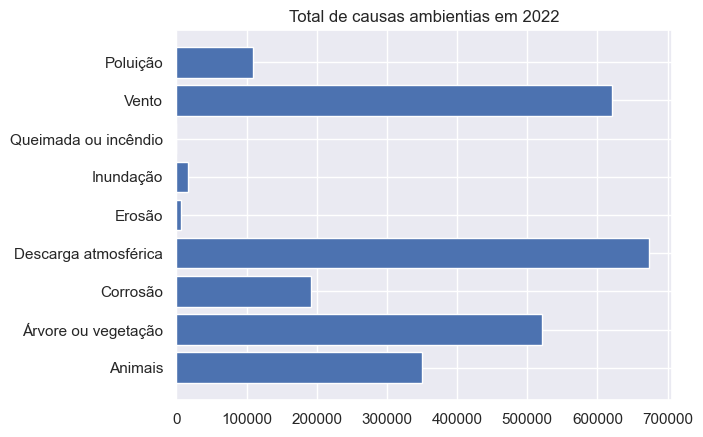

In [8]:
plt.barh(['Animais', 'Árvore ou vegetação', 'Corrosão', 'Descarga atmosférica', 
         'Erosão', 'Inundação', 'Queimada ou incêndio', 'Vento', 'Poluição'],
        [animais, arvore, corrosao, descarga, erosao, inundacao, queimada, vento, poluicao])
plt.title('Total de causas ambientias em 2022')
plt.show()

# Empresas

In [9]:
dt['CausaFlag'] =  cuase_falg
dt_ambiente = dt[dt['CausaFlag'] == 1]

In [10]:
dt_ambiente

,DatGeracaoConjuntoDados,DscCnjUndCnm,Aliment,Subs,NumInt,TipoInt,IdmotInt,DtInicioInt,DtFimInt,FatGerador,Tensao,NumCons,NumCOnsCjt,Ano,NomAgente,SigAgente,NumCPFCNPJ,CausaFlag
11,2023-04-10,Cruzeiro do Sul,01C5,CSU,2022-4,Não Programada,0,2022-01-01 00:34:00,2022-01-01 01:30:00,INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ARV...,13800,2,39430,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,1
12,2023-04-10,Cruzeiro do Sul,01C3,CSU,2022-4,Não Programada,0,2022-01-01 00:34:00,2022-01-01 01:30:00,INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ARV...,13800,1,39430,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,1
13,2023-04-10,Cruzeiro do Sul,01C1,CSU,2022-4,Não Programada,0,2022-01-01 00:34:00,2022-01-01 01:30:00,INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ARV...,13800,1,39430,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,1
14,2023-04-10,Cruzeiro do Sul,01C2,CSU,2022-4,Não Programada,0,2022-01-01 00:34:00,2022-01-01 01:30:00,INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ARV...,13800,437,39430,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,1
15,2023-04-10,TAQUARI,01C1,ACR,2022-4,Não Programada,0,2022-01-01 00:34:00,2022-01-01 01:30:00,INTERNA - NAO PROGRAMADA - MEIO AMBIENTE - ARV...,13800,1,46921,2022,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8444460,2023-04-10,ALTO SOLIMÕES,ABJDJ2-03,APIE-BJ,452186,Não Programada,0,2022-12-31 22:51:00,2022-12-31 23:16:00,Interna - Não Programada - Meio ambiente - Des...,13000,2217,36828,2022,Amazonas Energia S.A.,AME,2341467000120,1
8444461,2023-04-10,RIO NEGRO E BAIXO SOLIMÕES,ABCDJ2-01,APIE-BC,450480,Não Programada,0,2022-12-31 22:54:40,2023-01-01 00:49:25,Interna - Não Programada - Meio ambiente - Cor...,220,1,93067,2022,Amazonas Energia S.A.,AME,2341467000120,1
8444462,2023-04-10,MÉDIO SOLIMÕES E JURUÁ,AFBDJ2-02,APIE-FB,452310,Não Programada,0,2022-12-31 22:58:00,2022-12-31 23:03:00,Interna - Não Programada - Meio ambiente - Des...,13000,817,85141,2022,Amazonas Energia S.A.,AME,2341467000120,1
8444463,2023-04-10,MÉDIO SOLIMÕES E JURUÁ,AFBDJ2-02,APIE-FB,452289,Não Programada,0,2022-12-31 22:58:00,2022-12-31 23:03:00,Interna - Não Programada - Meio ambiente - Des...,13000,1211,85141,2022,Amazonas Energia S.A.,AME,2341467000120,1


In [11]:
deltas = []
chi = []
for element in range(len(dt_ambiente)):
    element_series = dt_ambiente.iloc[element]
    dt_start = element_series['DtInicioInt']
    dt_start = datetime.datetime.strptime(dt_start, '%Y-%m-%d %H:%M:%S')

    dt_final = element_series['DtFimInt']
    dt_final = datetime.datetime.strptime(dt_final, '%Y-%m-%d %H:%M:%S')

    delta = dt_final - dt_start
    deltas.append(delta.seconds/3600)
    chi.append(delta.seconds/3600*int(element_series['NumCons']))

In [12]:
dt_ambiente['CHI'] = chi
dt_ambiente['Tempo'] = delta

C:\Users\hlovi\AppData\Local\Temp\ipykernel_29936\2538741622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ambiente['CHI'] = chi
C:\Users\hlovi\AppData\Local\Temp\ipykernel_29936\2538741622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ambiente['Tempo'] = delta


In [13]:
emp = list(dt_ambiente['SigAgente'])
emp_set = list(set(emp))
count_emp = []
for i in emp_set:
    count_emp.append(emp.count(i))

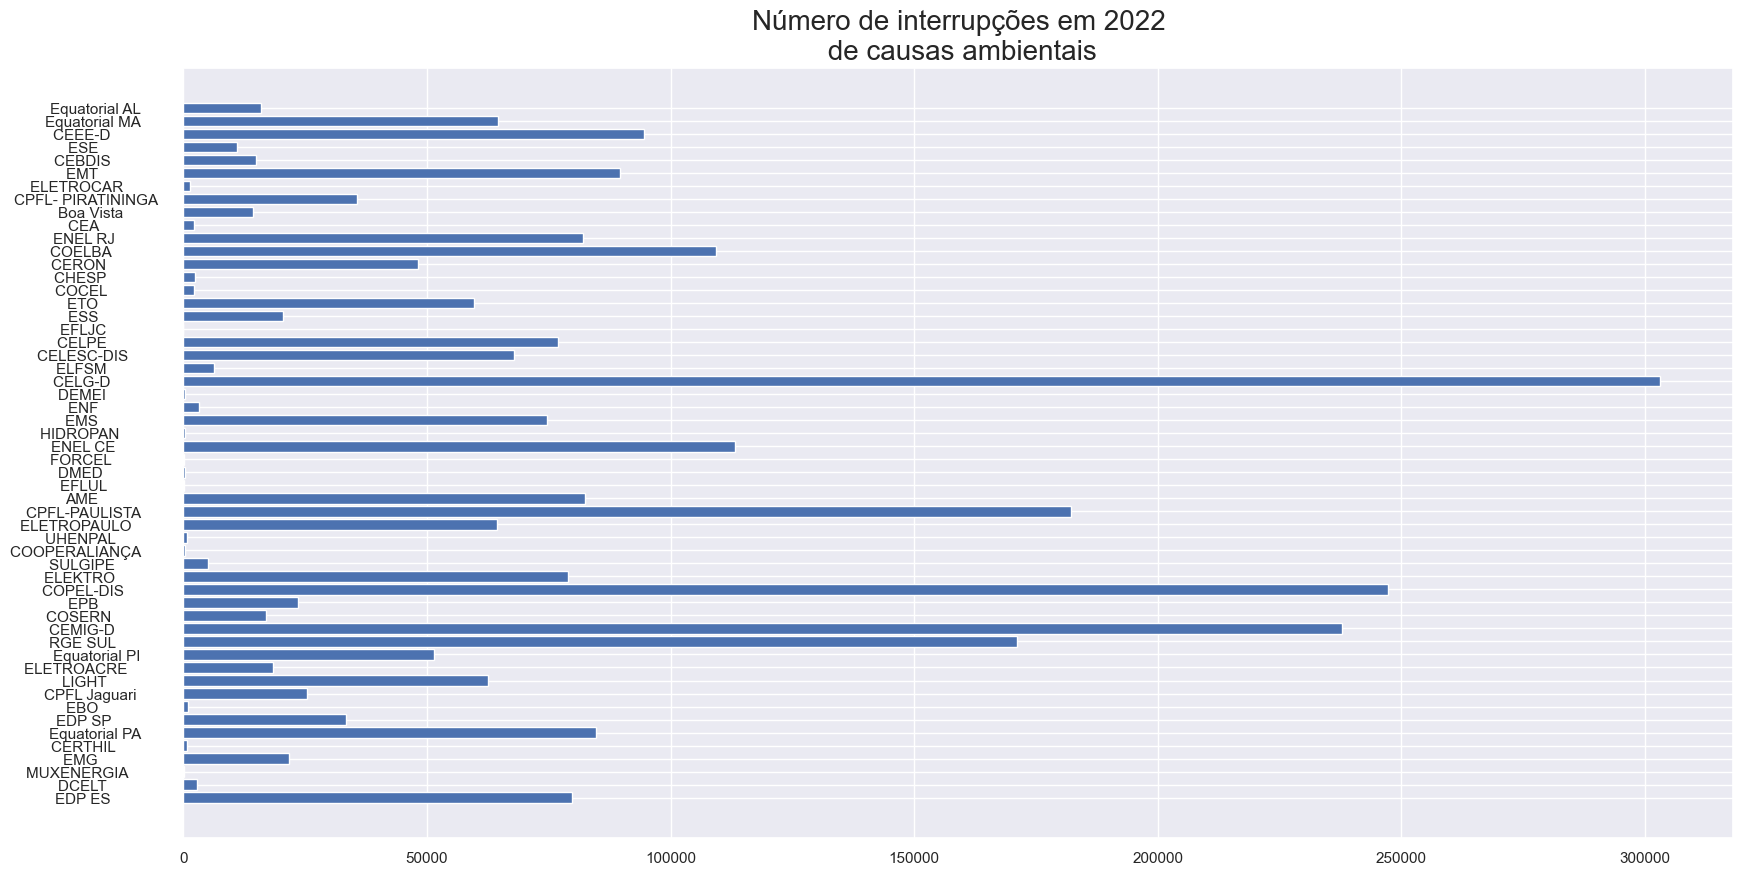

In [14]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, count_emp)
plt.title('Número de interrupções em 2022\n de causas ambientais', fontsize = 20)
plt.show()

In [15]:
cl_emp = []
for i in emp_set:
    cl_emp.append(sum(list(dt_ambiente[dt_ambiente['SigAgente'] == i]['NumCons'])))

cl_emp_norm = []
for i in emp_set:
    cl_emp_norm.append(sum(list(dt_ambiente[dt_ambiente['SigAgente'] == i]['NumCons']/dt_ambiente[dt_ambiente['SigAgente'] == i]['NumCOnsCjt'])))

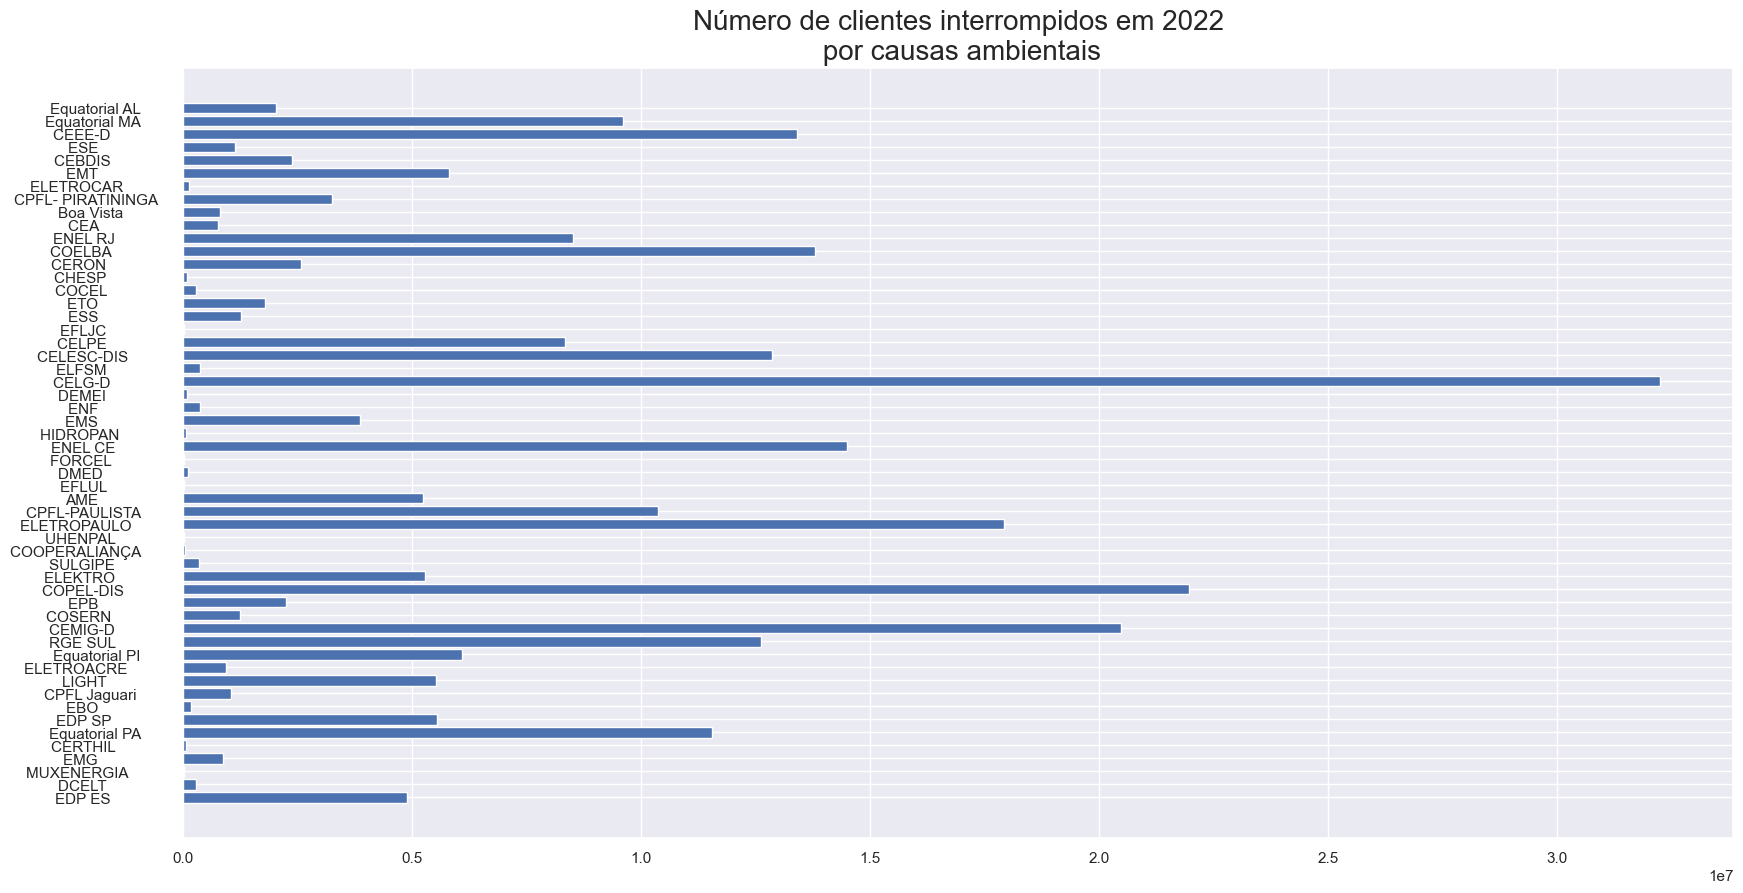

In [16]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, cl_emp)
plt.title('Número de clientes interrompidos em 2022\n por causas ambientais', fontsize = 20)
plt.show()

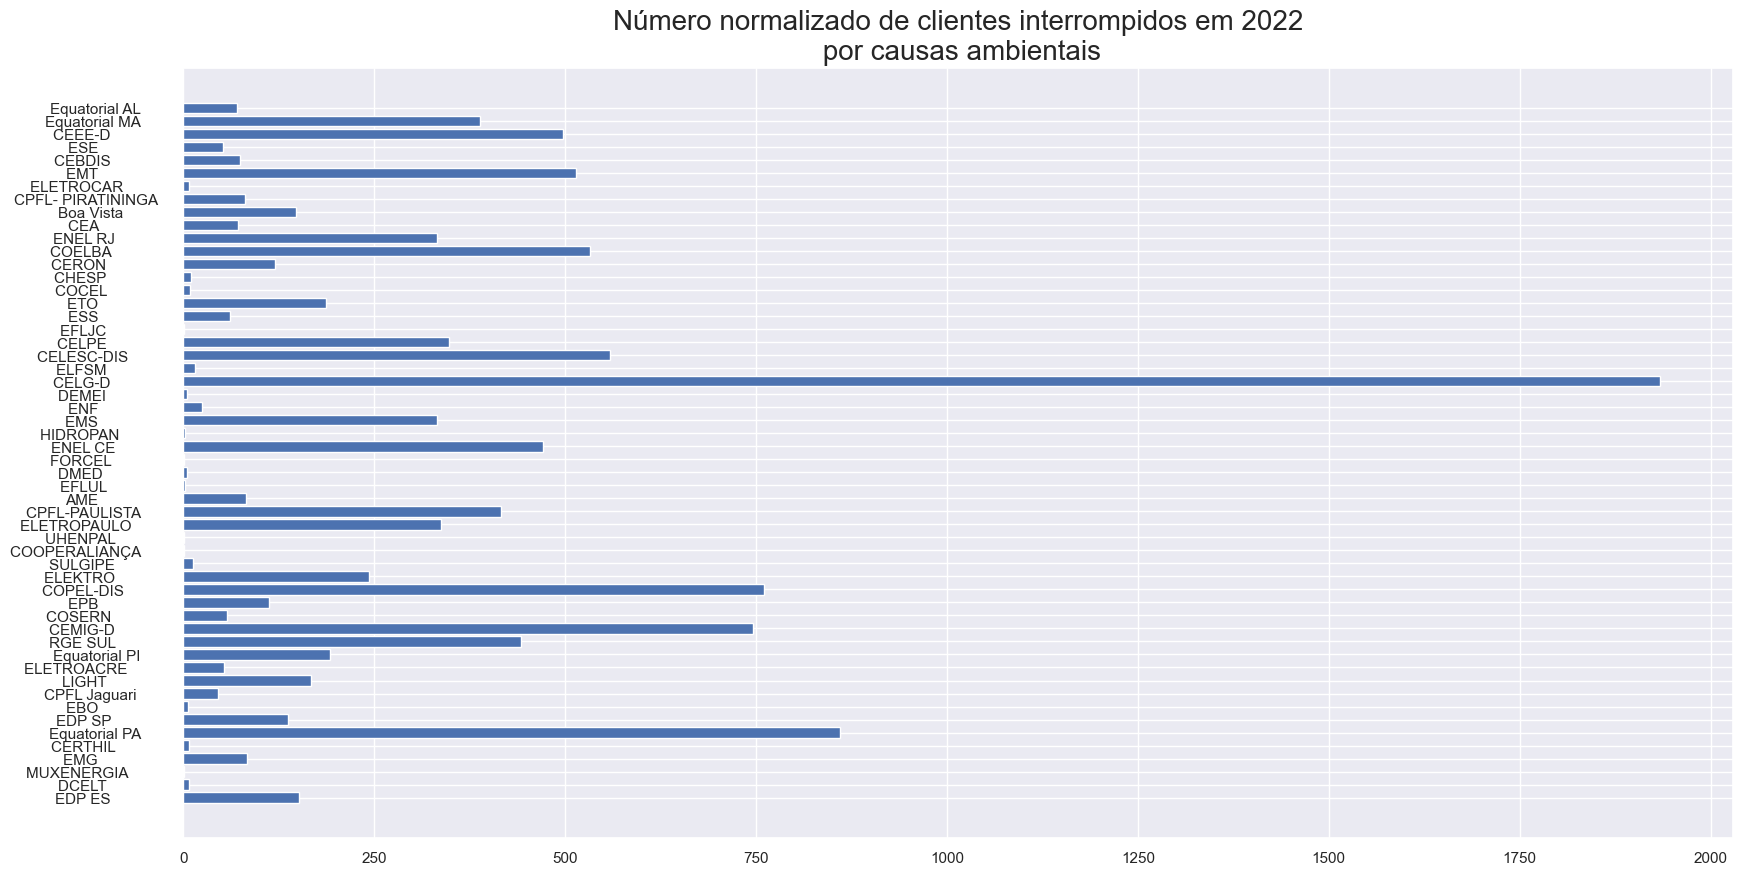

In [17]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, cl_emp_norm)
plt.title('Número normalizado de clientes interrompidos em 2022\n por causas ambientais', fontsize = 20)
plt.show()

In [18]:
dt_ambiente[dt_ambiente['SigAgente'] == emp_set[0]]['CHI']

2936949      1.966667
2936950    295.750000
2936951      0.366667
2936957     66.333333
2936959     32.416667
              ...    
3095004     34.650000
3095007    260.400000
3095012     17.816667
3095014    420.200000
3095015     50.200000
Name: CHI, Length: 79680, dtype: float64

In [19]:
chi_emp = []
for i in emp_set:
    chi_emp.append(sum(list(dt_ambiente[dt_ambiente['SigAgente'] == i]['CHI'])))

chi_emp_norm = []
for i in emp_set:
    chi_emp_norm.append(sum(list(dt_ambiente[dt_ambiente['SigAgente'] == i]['CHI']/dt_ambiente[dt_ambiente['SigAgente'] == i]['NumCOnsCjt'])))

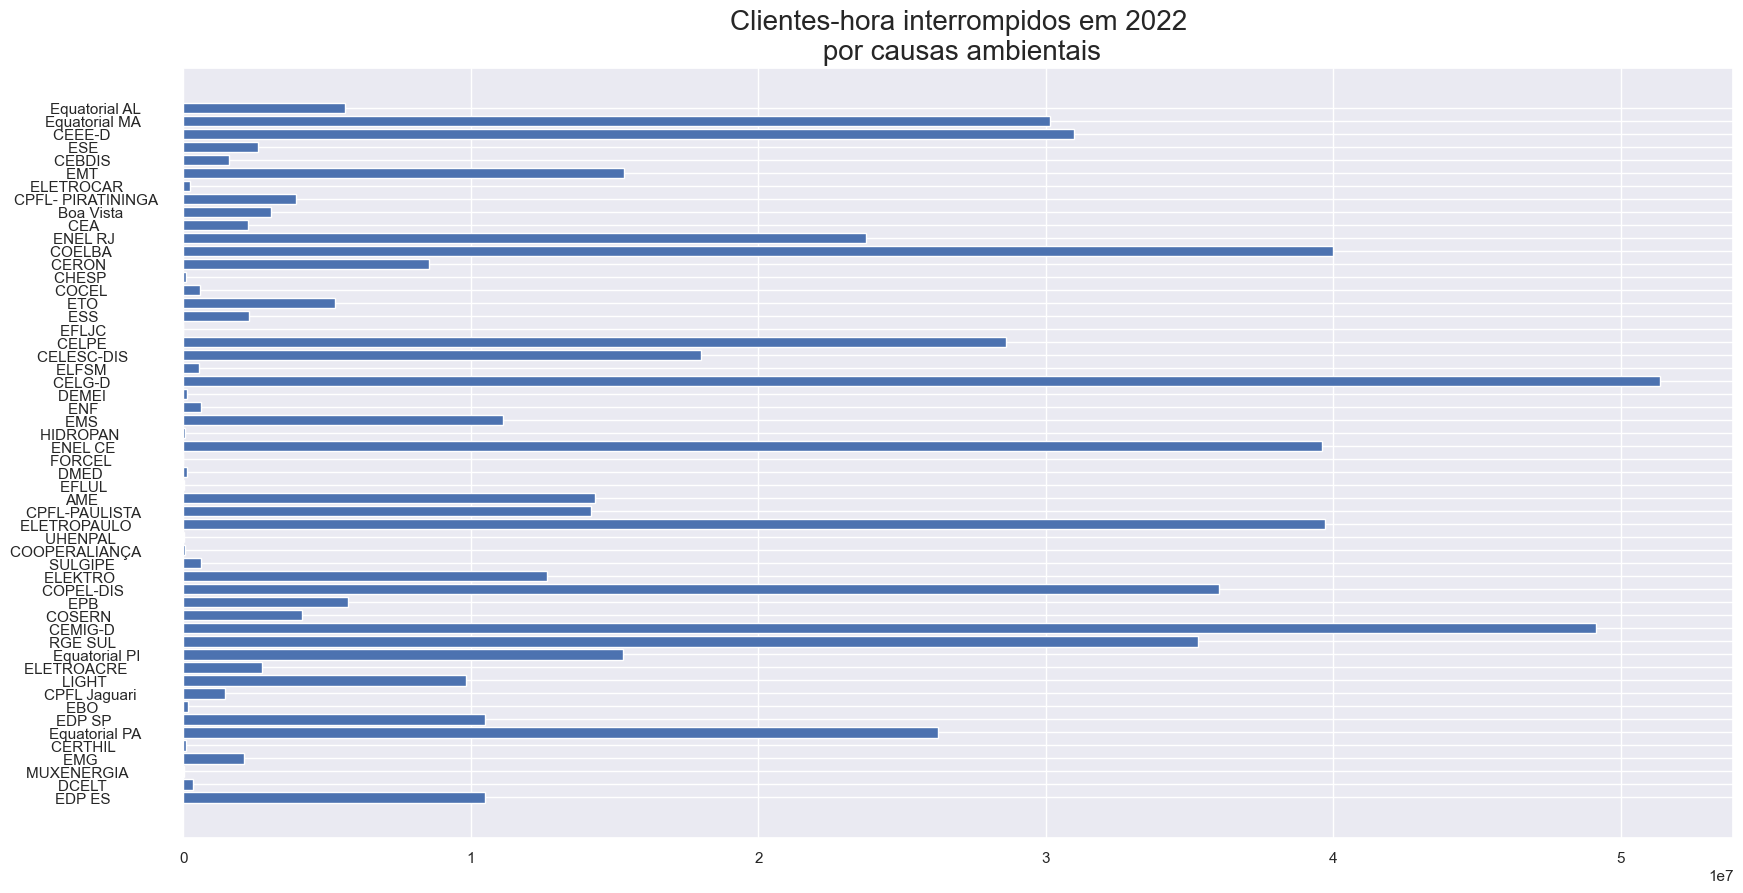

In [20]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, chi_emp)
plt.title('Clientes-hora interrompidos em 2022\n por causas ambientais', fontsize = 20)
plt.show()

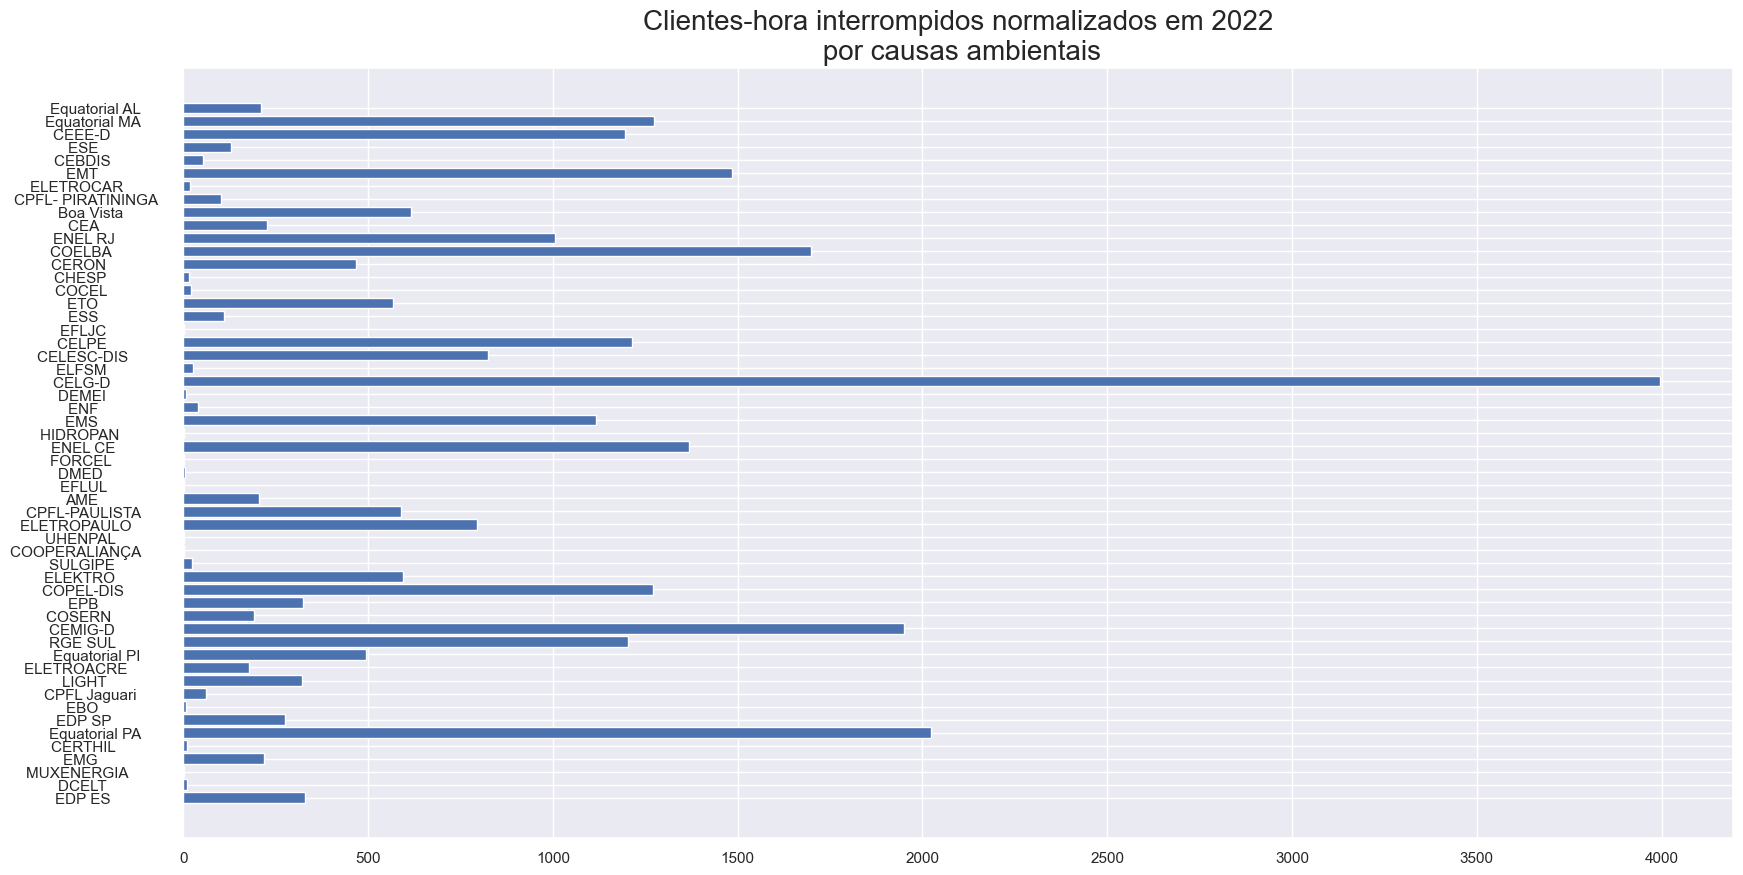

In [21]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, chi_emp_norm)
plt.title('Clientes-hora interrompidos normalizados em 2022\n por causas ambientais', fontsize = 20)
plt.show()

# Distribuição de tempo

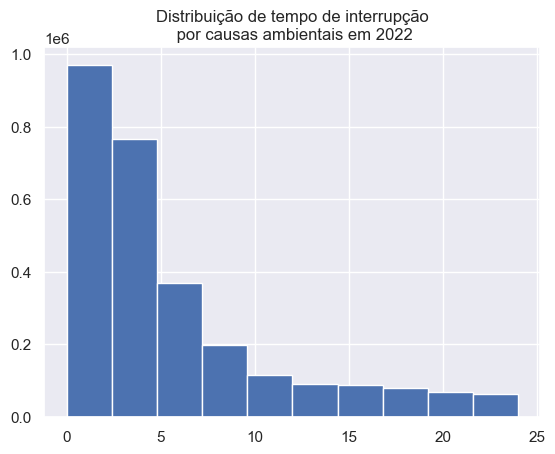

In [22]:
plt.hist(deltas)
plt.title('Distribuição de tempo de interrupção\n por causas ambientais em 2022')
plt.show()

In [23]:
flag_res = []
for el in deltas:
    if el > 12:
        flag_res.append(1)
    else:
        flag_res.append(0)

In [24]:
dt_ambiente['FlagTempo'] = flag_res

C:\Users\hlovi\AppData\Local\Temp\ipykernel_29936\2341910995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ambiente['FlagTempo'] = flag_res


In [25]:
chi_emp_res = []
for i in emp_set:
    chi_emp_res.append(sum(list(dt_ambiente[(dt_ambiente['SigAgente'] == i) & (dt_ambiente['FlagTempo'] == 1)]['CHI'])))
    
chi_emp_res_norm = []
for i in emp_set:
    chi_emp_res_norm.append(sum(list(dt_ambiente[(dt_ambiente['SigAgente'] == i) & (dt_ambiente['FlagTempo'] == 1)]['CHI']/(dt_ambiente[(dt_ambiente['SigAgente'] == i) & (dt_ambiente['FlagTempo'] == 1)]['NumCOnsCjt']))))

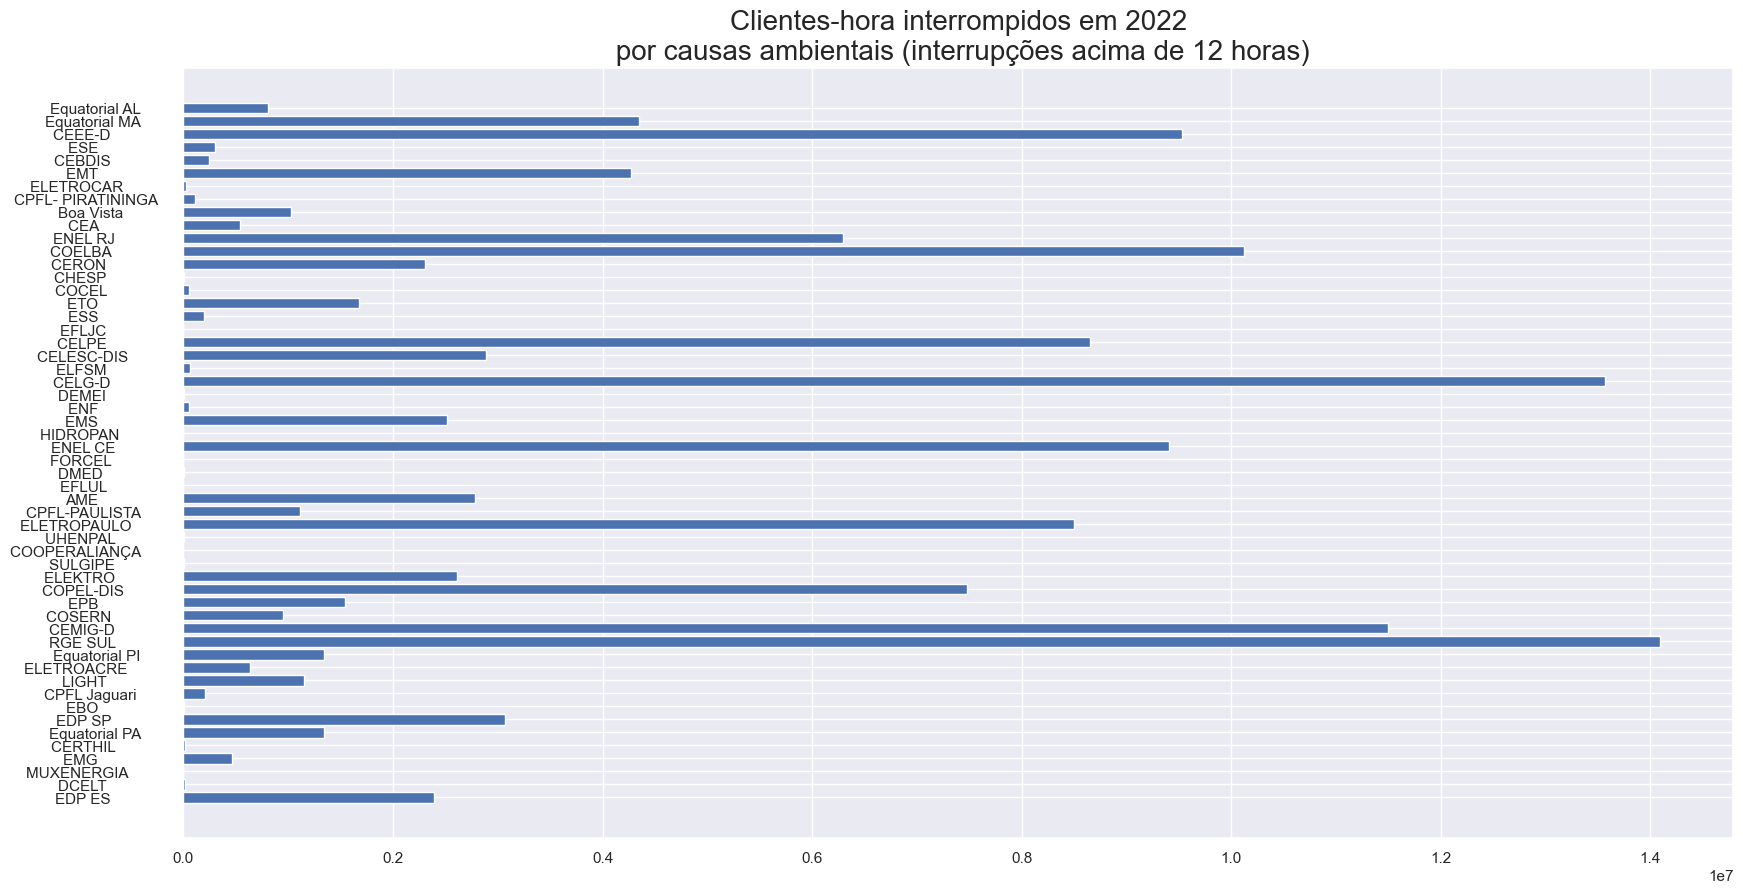

In [26]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, chi_emp_res)
plt.title('Clientes-hora interrompidos em 2022\n por causas ambientais (interrupções acima de 12 horas)', fontsize = 20)
plt.show()

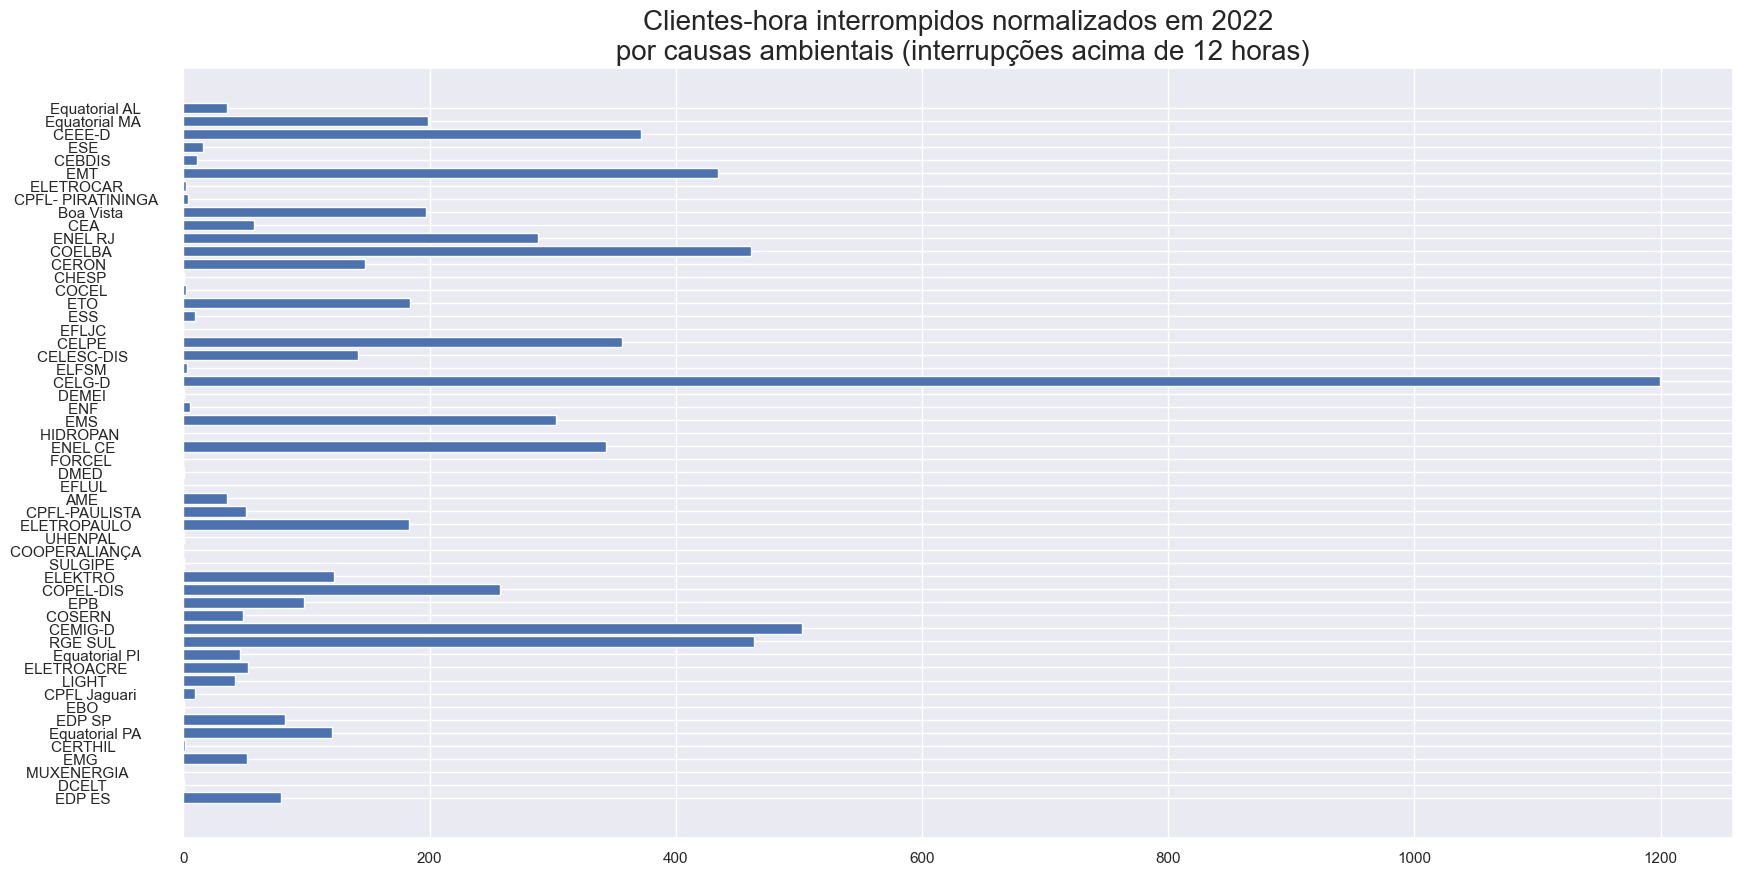

In [27]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, chi_emp_res_norm)
plt.title('Clientes-hora interrompidos normalizados em 2022\n por causas ambientais (interrupções acima de 12 horas)', fontsize = 20)
plt.show()

# Distribuição de resiliência

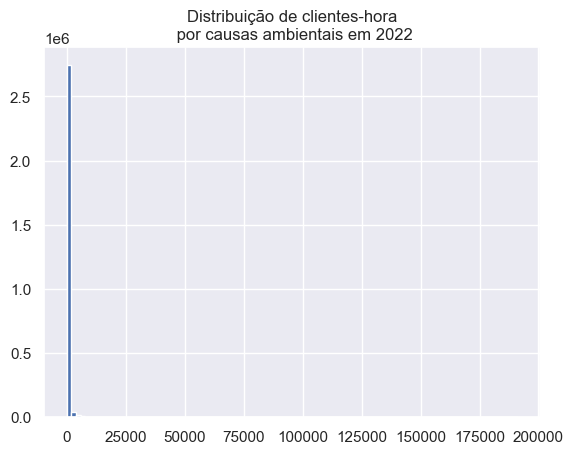

In [28]:
plt.hist(chi, bins = 100)
plt.title('Distribuição de clientes-hora\n por causas ambientais em 2022')
plt.show()

In [29]:
np.percentile(chi, 75)

118.68770833333333

In [30]:
flag_res_chi = []
for el in chi:
    if el > 100:
        flag_res_chi.append(1)
    else:
        flag_res_chi.append(0)

In [31]:
dt_ambiente['FlagChi'] = flag_res_chi

C:\Users\hlovi\AppData\Local\Temp\ipykernel_29936\3188691022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_ambiente['FlagChi'] = flag_res_chi


In [32]:
chi_emp_res_fg = []
for i in emp_set:
    chi_emp_res_fg.append(sum(list(dt_ambiente[(dt_ambiente['SigAgente'] == i) & (dt_ambiente['FlagChi'] == 1)]['CHI'])))

chi_emp_res_fg_norm = []
for i in emp_set:
    chi_emp_res_fg_norm.append(sum(list(dt_ambiente[(dt_ambiente['SigAgente'] == i) & (dt_ambiente['FlagChi'] == 1)]['CHI']/(dt_ambiente[(dt_ambiente['SigAgente'] == i) & (dt_ambiente['FlagChi'] == 1)]['NumCOnsCjt']))))

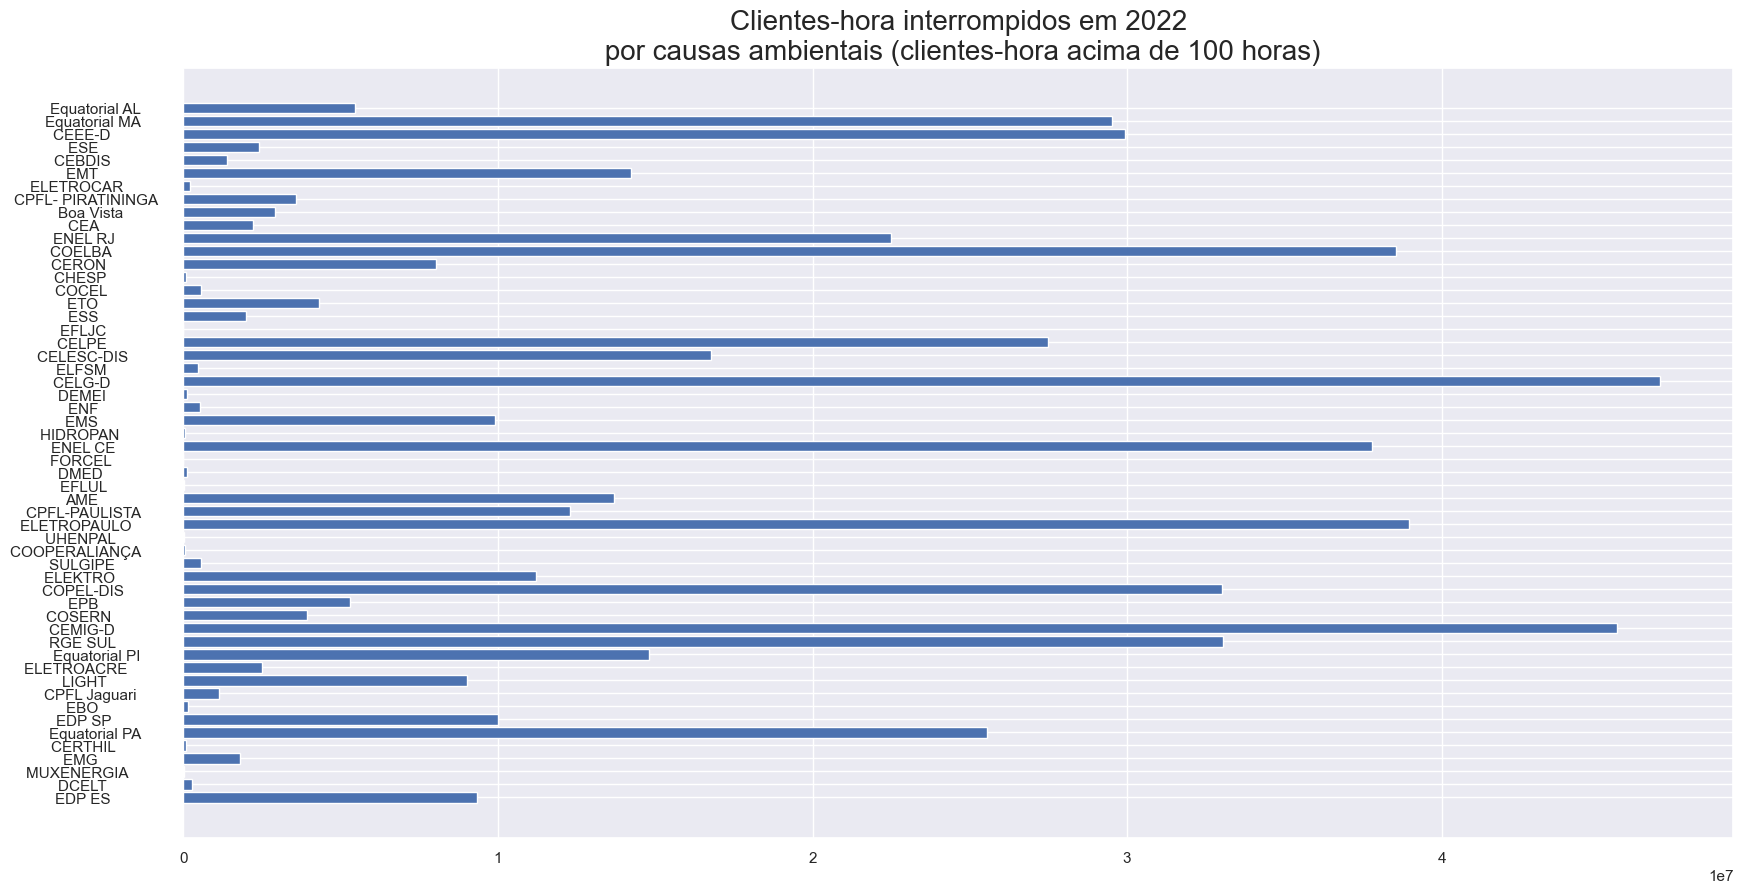

In [33]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, chi_emp_res_fg)
plt.title('Clientes-hora interrompidos em 2022\n por causas ambientais (clientes-hora acima de 100 horas)', fontsize = 20)
plt.show()

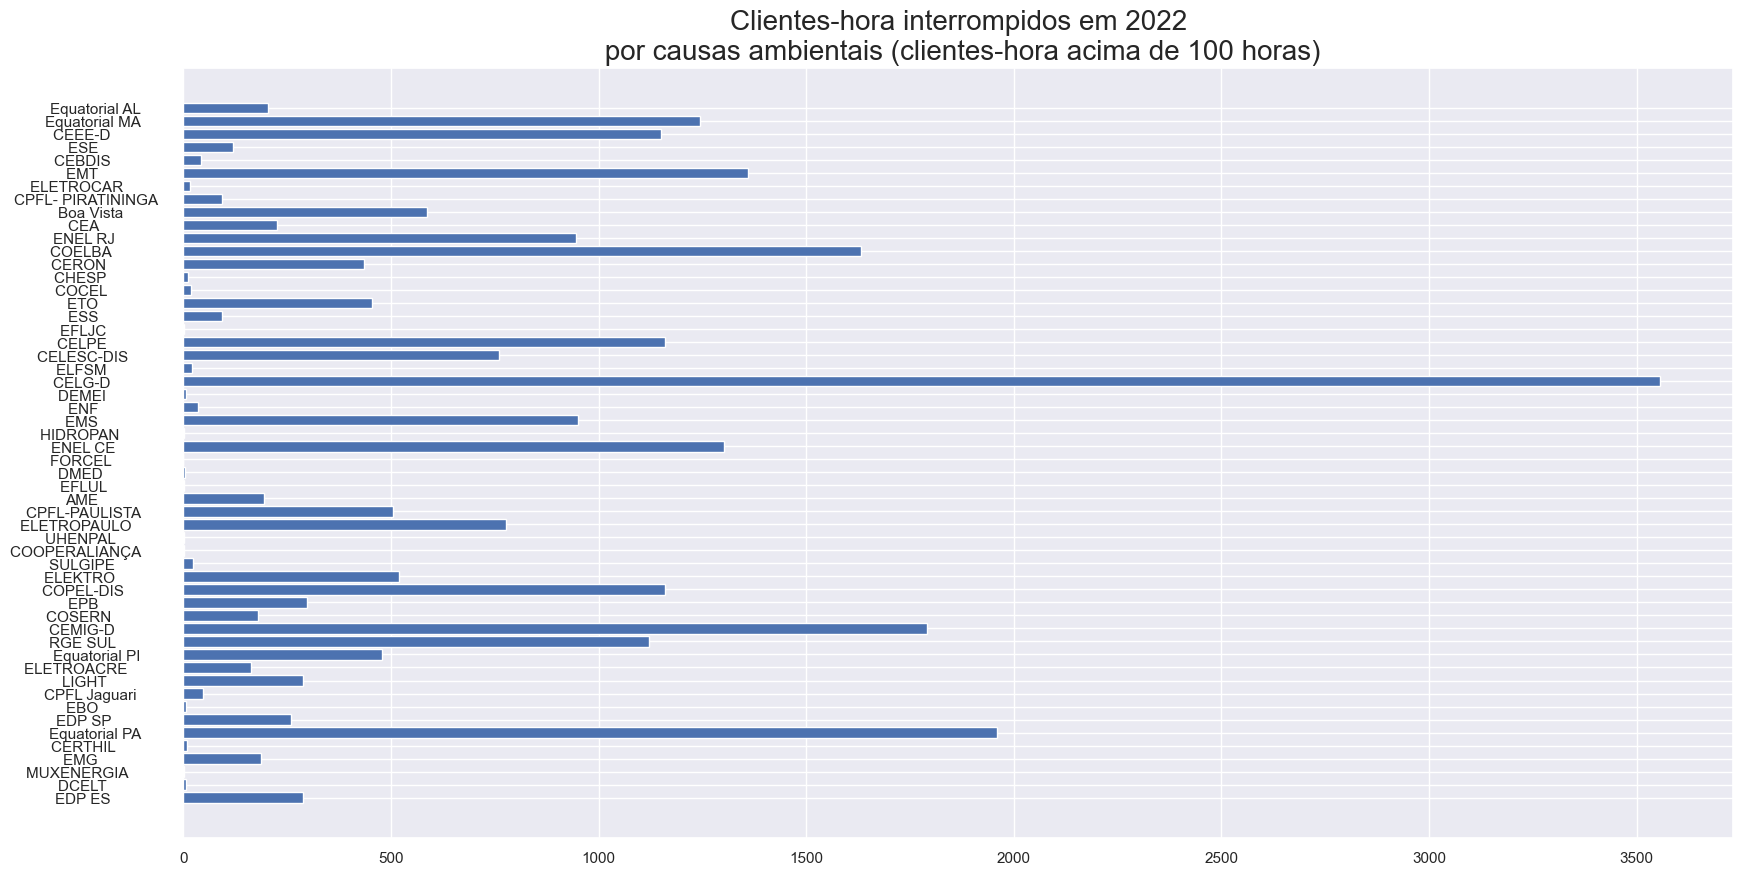

In [34]:
plt.figure(figsize=(20,10))

plt.barh(emp_set, chi_emp_res_fg_norm)
plt.title('Clientes-hora interrompidos em 2022\n por causas ambientais (clientes-hora acima de 100 horas)', fontsize = 20)
plt.show()